In [1]:
import sys
from pathlib import Path
p_root = Path("~licanchengup/link/res_publish").expanduser()
None if str(p_root) in sys.path else sys.path.append(str(p_root))

In [2]:
from func import *
help()

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-29 18:10:21.434320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig


-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



In [3]:
adata_sle = load_adata(p_cache.joinpath('disease','SLE_mouse_LN_kidney'))
display(adata_sle,adata_sle.obs.head(2),adata_sle.obs.shape)
display(adata_sle.obs.isna().any())

AnnData object with n_obs × n_vars = 14224 × 27998
    obs: '_batch', 'treatment', 'sample', 'seurat_clusters', 'cell_type', 'UMAP1', 'UMAP2'
    var: 'gene_ids'

,_batch,treatment,sample,seurat_clusters,cell_type,UMAP1,UMAP2
AAACCCAGTAGACAGC-1;B42,SLE_FMT_B42,SLE_FMT,B42,0.0,LOH,3.428371,-9.391080
AAACCCATCAGATTGC-1;B42,SLE_FMT_B42,SLE_FMT,B42,2.0,LOH,1.140191,-3.527618


(14224, 7)

_batch             False
treatment          False
sample             False
seurat_clusters    False
cell_type          False
UMAP1              False
UMAP2              False
dtype: bool

In [4]:
adata_healthy = load_adata(p_cache.joinpath('healthy/m_kidney'))
display(adata_healthy,adata_healthy.obs.head(2),adata_healthy.obs.shape)
display(adata_healthy.obs.isna().any())

AnnData object with n_obs × n_vars = 43703 × 16272
    obs: '_batch', 'cell_type', 'UMAP1', 'UMAP2', 'seurat_clusters', 'Cluster_Number', 'pre_cell_type'
    var: 'gene_ids'

,_batch,cell_type,UMAP1,UMAP2,seurat_clusters,Cluster_Number,pre_cell_type
AAACCTGAGATATGCA-1,lost_7_batches,LOH,-1.293267,7.354623,1.0,3,LOH
AAACCTGGTTGTGGCC-1,lost_7_batches,CD-PC,3.019838,-7.278323,0.0,5,CD-PC


(43703, 7)

_batch             False
cell_type          False
UMAP1              False
UMAP2              False
seurat_clusters    False
Cluster_Number     False
pre_cell_type      False
dtype: bool

# merge

In [5]:
adata_merge = sc.concat(
    {'healthy':adata_healthy,'SLE':adata_sle},
    index_unique=';')
display(adata_merge.obs.head(2),adata_merge.obs.shape)

,_batch,cell_type,UMAP1,UMAP2,seurat_clusters
AAACCTGAGATATGCA-1;healthy,lost_7_batches,LOH,-1.293267,7.354623,1.0
AAACCTGGTTGTGGCC-1;healthy,lost_7_batches,CD-PC,3.019838,-7.278323,0.0


(57927, 5)

In [6]:
# # 各自定义的细胞类型与各自的UMAP坐标，未进行整合
# adata_merge.obs['sub_cell_type'] = adata_merge.obs['cell_type']
# adata_merge.obs['status'] = adata_merge.obs['_batch']
# adata_merge.obs['status'] = adata_merge.obs['status'].mask(
#     adata_merge.obs['_batch'].str.startswith('SLE'),
#     adata_merge.obs['status'].apply(
#     lambda x: '_'.join(
#             x.split('_')[1
#                 :-1])
# ))
# adata_merge.obs['status'] = adata_merge.obs['status'].map(lambda k:{
#     'lost_7_batches':'healthy'
# }.setdefault(k,k))

# display(adata_merge,
#     adata_merge.obs.head(2),adata_merge.obs.shape,
#     adata_merge.var.head(2),adata_merge.var.shape,
#     adata_merge.obs['status'].value_counts(),
#     adata_merge.obs['sub_cell_type'].value_counts()
# )

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired v

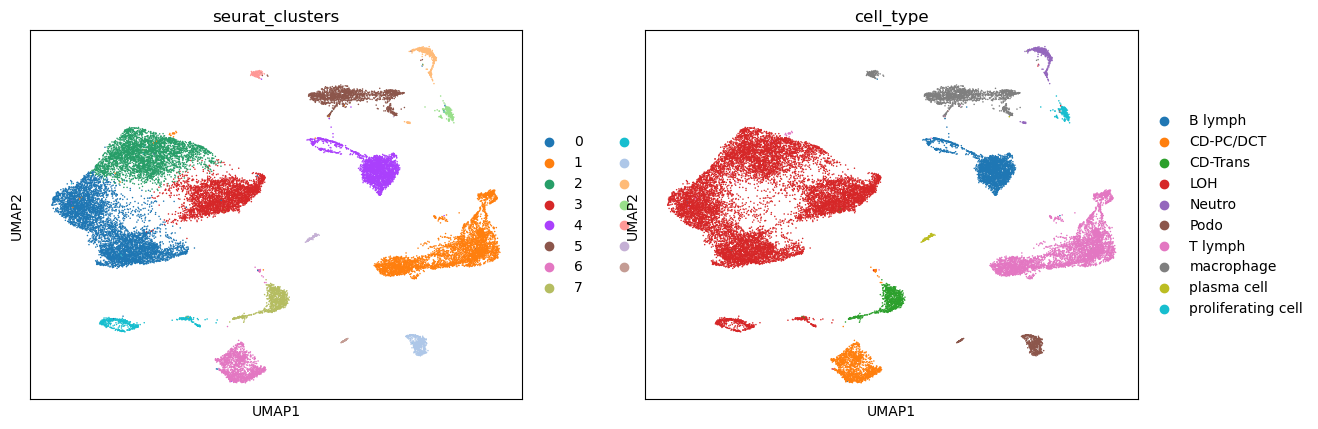

,_batch,status,cell_type,seurat_clusters,pre_cell_type,UMAP1,UMAP2
AAACGGGAGCGTCTAT-1;healthy,lost_7_batches,healthy,LOH,0,LOH,-7.645635,-4.623564
AAACGGGGTGTGGTTT-1;healthy,lost_7_batches,healthy,LOH,3,LOH,-2.782715,2.627203


(25322, 7)

In [7]:
# 整合后的metadata
# obs_seurat_merge.csv 是 merge_cluster.ipynb 的输出
_df_obs = pd.read_csv('obs_seurat_merge.csv',index_col=0)
_df_obs['seurat_clusters'] = _df_obs['seurat_clusters'].astype(str)
adata_merge = adata_merge[_df_obs.index,:]
adata_merge.obs = adata_merge.obs.loc[:,[]].join(_df_obs)
adata_merge.obsm['X_umap'] = adata_merge.obs.loc[:,'UMAP1,UMAP2'.split(',')].to_numpy()
sc.pl.umap(adata_merge,color='seurat_clusters,cell_type'.split(','))
display(adata_merge.obs.head(2),adata_merge.obs.shape)

In [8]:
h5ad_to_mtx(adata_merge,p_cache\
            .joinpath('disease','merge_mouse_kideny_healthy_SLE')
           )

frist 10 adata.X nonzero elements:
 [[ 1 10  1  1  1  4  1  1  2  3]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/disease/merge_mouse_kideny_healthy_SLE


In [9]:
del adata_healthy,adata_sle

# adata_imm


In [10]:
display(group_agg(adata_merge.obs,['cell_type']))
print(','.join(adata_merge.obs['cell_type'].unique()))

,cell_type,cell_type_count
0,B lymph,2507
1,CD-PC/DCT,1519
2,CD-Trans,873
3,LOH,13027
4,Neutro,453
5,Podo,615
6,T lymph,4189
7,macrophage,1728
8,plasma cell,165
9,proliferating cell,246


LOH,T lymph,Neutro,CD-Trans,CD-PC/DCT,B lymph,macrophage,Podo,proliferating cell,plasma cell


In [11]:
adata_imm = subset_adata(adata_merge,'cell_type','T lymph,Neutro,B lymph,macrophage,proliferating cell,plasma cell'.split(','))
adata_imm.obs['cell_type'] = adata_imm.obs['cell_type'].map(
    lambda k:{
    'T lymph':'T cell',
    'B lymph':'B cell',
    'macrophage':'macrophage',
    'Neutro':'neutrophil',
    'plasma cell':'plasma cell'
}.setdefault(k,k))
display(adata_imm.obs.head(2),adata_imm.obs.shape,
        group_agg(adata_imm.obs,['cell_type']))

/tmp/ipykernel_10345/1777669485.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_imm.obs['cell_type'] = adata_imm.obs['cell_type'].map(


,_batch,status,cell_type,seurat_clusters,pre_cell_type,UMAP1,UMAP2
AAAGATGGTCCGACGT-1;healthy,lost_7_batches,healthy,T cell,1,T lymph,11.838856,-2.450299
AACACGTGTCGTTGTA-1;healthy,lost_7_batches,healthy,neutrophil,10,myeloid cell,7.933000,8.056559


(9288, 7)

,cell_type,cell_type_count
0,B cell,2507
1,neutrophil,453
2,T cell,4189
3,macrophage,1728
4,plasma cell,165
5,proliferating cell,246


In [12]:
h5ad_to_mtx(adata_imm,p_cache\
    .joinpath('disease','merge_mouse_kideny_healthy_SLE_imm'))

frist 10 adata.X nonzero elements:
 [[1 1 1 5 1 1 9 1 1 1]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/disease/merge_mouse_kideny_healthy_SLE_imm


# adata_T

In [13]:
adata_T = subset_adata(adata_imm,'cell_type',['T cell'])
adata_T.obs.head(2)

,_batch,status,cell_type,seurat_clusters,pre_cell_type,UMAP1,UMAP2
AAAGATGGTCCGACGT-1;healthy,lost_7_batches,healthy,T cell,1,T lymph,11.838856,-2.450299
AACACGTTCTGAGTGT-1;healthy,lost_7_batches,healthy,T cell,1,T lymph,7.240414,-5.332770


In [14]:
## 直接输出
# h5ad_to_mtx(adata_T,p_cache\
#     .joinpath('disease','merge_mouse_kideny_healthy_SLE_imm_T'))

In [15]:
# 整合后的metadata
# obs_seurat_merge_T.csv 是 merge_cluster_T.ipynb 的输出
_df_obs = pd.read_csv('obs_seurat_merge_T.csv',index_col=0)
_df_obs['seurat_clusters'] = _df_obs['seurat_clusters'].astype(str)

_df_obs.head(2)

# adata_merge = adata_merge[_df_obs.index,:]
# adata_merge.obs = adata_merge.obs.loc[:,[]].join(_df_obs)
# adata_merge.obsm['X_umap'] = adata_merge.obs.loc[:,'UMAP1,UMAP2'.split(',')].to_numpy()
# sc.pl.umap(adata_merge,color='seurat_clusters,cell_type'.split(','))
# display(adata_merge.obs.head(2),adata_merge.obs.shape)

,orig.ident,_batch,status,seurat_clusters,seurat_clusters_0.25,cell_type,sub_cell_type,UMAP1,UMAP2
cell_name,,,,,,,,,
AAAGATGGTCCGACGT-1;healthy,SeuratProject,lost_7_batches,healthy,4,4,NK T,NK T,-6.065876,6.291645
AACACGTTCTGAGTGT-1;healthy,SeuratProject,lost_7_batches,healthy,14,1,CD4+ T,CD4+ naive,-5.847698,2.842119


In [16]:
display(pd.Series(adata_T.obs.index.isin(_df_obs.index)).value_counts())
adata_T = adata_T[_df_obs.index,:]
adata_T.obs = adata_T.obs.loc[:,[]].join(_df_obs)
display(adata_T.obs.head(2),adata_T.obs.shape,
        adata_T.obs['cell_type'].value_counts())

True     3976
False     213
Name: count, dtype: int64

,orig.ident,_batch,status,seurat_clusters,seurat_clusters_0.25,cell_type,sub_cell_type,UMAP1,UMAP2
AAAGATGGTCCGACGT-1;healthy,SeuratProject,lost_7_batches,healthy,4,4,NK T,NK T,-6.065876,6.291645
AACACGTTCTGAGTGT-1;healthy,SeuratProject,lost_7_batches,healthy,14,1,CD4+ T,CD4+ naive,-5.847698,2.842119


(3976, 9)

cell_type
CD4+ T    1955
CD8+ T    1132
NK T       518
NK         371
Name: count, dtype: int64

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired v

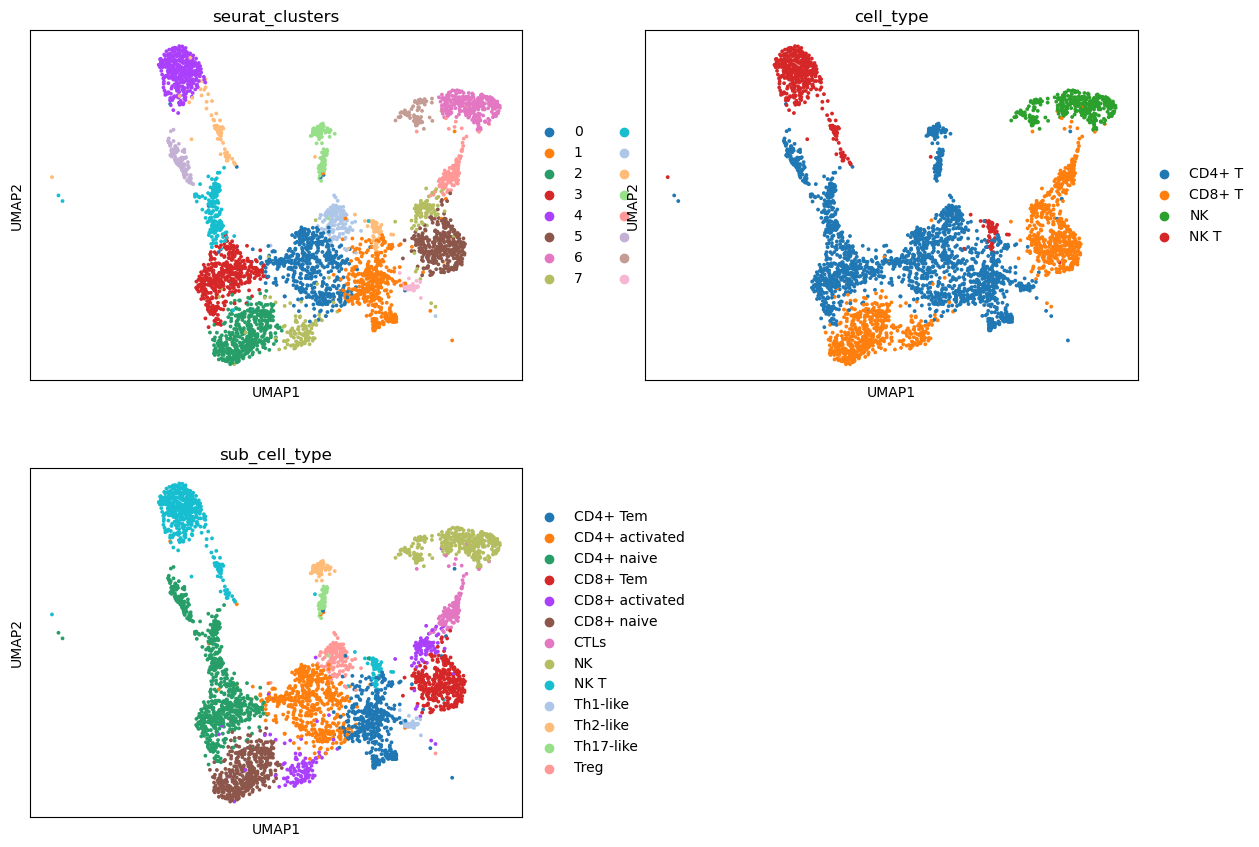

In [17]:
adata_T.obsm['X_umap'] = adata_T.obs.loc[:,'UMAP1,UMAP2'.split(',')].to_numpy()
sc.pl.umap(adata_T,color='seurat_clusters,cell_type,sub_cell_type'.split(','),ncols=2)

In [18]:
# T_NK_NKT
h5ad_to_mtx(adata_T,p_cache\
    .joinpath('disease','merge_mouse_kideny_healthy_SLE_imm_T_NK_NKT'))

frist 10 adata.X nonzero elements:
 [[1 1 1 5 1 1 9 1 1 1]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/disease/merge_mouse_kideny_healthy_SLE_imm_T_NK_NKT


In [19]:
adata_T = subset_adata(adata_T,'cell_type','CD4+ T,CD8+ T'.split(','))
display(adata_T.obs.head(2),adata_T.obs.shape,
        adata_T.obs['cell_type'].value_counts())

,orig.ident,_batch,status,seurat_clusters,seurat_clusters_0.25,cell_type,sub_cell_type,UMAP1,UMAP2
AACACGTTCTGAGTGT-1;healthy,SeuratProject,lost_7_batches,healthy,14,1,CD4+ T,CD4+ naive,-5.847698,2.842119
AACTCCCCACGAAATA-1;healthy,SeuratProject,lost_7_batches,healthy,14,1,CD4+ T,CD4+ naive,-5.474016,2.590057


(3087, 9)

cell_type
CD4+ T    1955
CD8+ T    1132
Name: count, dtype: int64

In [20]:
# T
h5ad_to_mtx(adata_T,p_cache\
    .joinpath('disease','merge_mouse_kideny_healthy_SLE_imm_T'))
del adata_T

/public/workspace/licanchengup/link/res_publish/func.py:1127: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["gene_names"] = adata.var_names.to_numpy()


frist 10 adata.X nonzero elements:
 [[11  1  2  1  2  1  5  1  1  1]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/disease/merge_mouse_kideny_healthy_SLE_imm_T


# adata_B

In [21]:
display(adata_imm.obs.head(2),adata_imm.obs['cell_type'].value_counts())
adata_B = subset_adata(adata_imm,'cell_type',['B cell','plasma cell'])
display(adata_B.obs.head(2),adata_B.obs['cell_type'].value_counts())

,_batch,status,cell_type,seurat_clusters,pre_cell_type,UMAP1,UMAP2
AAAGATGGTCCGACGT-1;healthy,lost_7_batches,healthy,T cell,1,T lymph,11.838856,-2.450299
AACACGTGTCGTTGTA-1;healthy,lost_7_batches,healthy,neutrophil,10,myeloid cell,7.933000,8.056559


cell_type
T cell                4189
B cell                2507
macrophage            1728
neutrophil             453
proliferating cell     246
plasma cell            165
Name: count, dtype: int64

,_batch,status,cell_type,seurat_clusters,pre_cell_type,UMAP1,UMAP2
AACTCCCGTGTCGCTG-1;healthy,lost_7_batches,healthy,B cell,4,myeloid cell,6.684379,3.053400
AACTGGTTCGGCTTGG-1;healthy,lost_7_batches,healthy,B cell,4,myeloid cell,7.122852,5.160845


cell_type
B cell         2507
plasma cell     165
Name: count, dtype: int64

In [22]:
# # 直接输出
# h5ad_to_mtx(adata_B,p_cache\
#     .joinpath('disease','merge_mouse_kideny_healthy_SLE_imm_B'))

In [23]:
# 整合后的metadata
# obs_seurat_merge_B.csv 是 merge_cluster_B.ipynb 的输出
_df_obs = pd.read_csv('obs_seurat_merge_B.csv',index_col=0)
adata_B.obs = adata_B.obs.loc[:,[]].join(_df_obs)
display(adata_B.obs.head(2),adata_B.obs['sub_cell_type'].value_counts())

,_batch,status,cell_type,sub_cell_type,seurat_clusters,UMAP1,UMAP2
AACTCCCGTGTCGCTG-1;healthy,lost_7_batches,healthy,B cell,B unknow 2,4,-13.588529,1.347817
AACTGGTTCGGCTTGG-1;healthy,lost_7_batches,healthy,B cell,B unknow 1,3,-12.588177,0.254320


sub_cell_type
B unknow 1     2060
B unknow 2      451
plasma cell     161
Name: count, dtype: int64

In [24]:
# B
h5ad_to_mtx(adata_B,p_cache\
    .joinpath('disease','merge_mouse_kideny_healthy_SLE_imm_B'))
del adata_B

frist 10 adata.X nonzero elements:
 [[1 1 1 3 1 1 2 1 2 9]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/disease/merge_mouse_kideny_healthy_SLE_imm_B


In [25]:
print('\n[finish]\n'.center(100,'-'))

---------------------------------------------
[finish]
---------------------------------------------
